## **Importando bibliotecas**

In [9]:
import pandas as pd

import missingno
import matplotlib.pyplot as plt

## **Importando dados**

In [10]:
df = pd.read_csv("data/scotch.csv")

In [11]:
df.head()

,Unnamed: 0,Unnamed: 1,color,color.1,color.2,color.3,color.4,color.5,color.6,color.7,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,NAME,NaN,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
1,Aberfeldy,Aberfeldy,0,1,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
2,Aberlour,Aberlour,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
3,Ardberg,Ardberg,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0
4,Ardmore,Ardmore,0,0,0,0,1,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0


## **Tratamento de dados**

*Visualizando as features*

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'color', 'color.1', 'color.2', 'color.3',
       'color.4', 'color.5', 'color.6', 'color.7', 'color.8', 'color.9',
       'color.10', 'color.11', 'color.12', 'color.13', 'NOSE', 'NOSE.1',
       'NOSE.2', 'NOSE.3', 'NOSE.4', 'NOSE.5', 'NOSE.6', 'NOSE.7', 'NOSE.8',
       'NOSE.9', 'NOSE.10', 'NOSE.11', 'BODY', 'BODY.1', 'BODY.2', 'BODY.3',
       'BODY.4', 'BODY.5', 'BODY.6', 'BODY.7', 'PAL', 'PAL.1', 'PAL.2',
       'PAL.3', 'PAL.4', 'PAL.5', 'PAL.6', 'PAL.7', 'PAL.8', 'PAL.9', 'PAL.10',
       'PAL.11', 'PAL.12', 'PAL.13', 'PAL.14', 'FIN', 'FIN.1', 'FIN.2',
       'FIN.3', 'FIN.4', 'FIN.5', 'FIN.6', 'FIN.7', 'FIN.8', 'FIN.9', 'FIN.10',
       'FIN.11', 'FIN.12', 'FIN.13', 'FIN.14', 'FIN.15', 'FIN.16', 'FIN.17',
       'FIN.18', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed:

*Analisando colunas unnamed*

In [13]:
df[['Unnamed: 1', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84']]

,Unnamed: 1,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,NaN,AGE,DIST,SCORE,%,REGION,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
1,Aberfeldy,-9,2,69,40,HIGH,MIDLAND,0,1,0,0,0,0,0,0,0
2,Aberlour,12,4,83,43,HIGH,SPEY,0,0,1,0,0,0,0,0,0
3,Ardberg,10,4,85,40,ISLAY,SOUTH,1,0,0,0,0,0,0,0,0
4,Ardmore,18,2,66,46,HIGH,SPEY,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Tomintoul,12,3,76,40,HIGH,SPEY,0,0,1,0,0,0,0,0,0
108,Tormore,10,3,76,43,HIGH,SPEY,0,0,1,0,0,0,0,0,0
109,Tullibardi,10,3,76,40,HIGH,MIDLAND,0,1,0,0,0,0,0,0,0
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Vamos excluir todas as colunas unnamed*

In [14]:
df.drop(columns=['Unnamed: 1', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84'], inplace = True)

In [15]:
df.shape

(112, 69)

In [16]:
df.tail()

,Unnamed: 0,color,color.1,color.2,color.3,color.4,color.5,color.6,color.7,color.8,...,FIN.9,FIN.10,FIN.11,FIN.12,FIN.13,FIN.14,FIN.15,FIN.16,FIN.17,FIN.18
107,Tomintoul,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
108,Tormore,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
109,Tullibardine,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,8,2,2,4,10,21,2,27,5,...,21,18,14,6,8,7,11,24,4,6


*vamos excluir as duas ultimas linhas do nosso df pois não fazem muito sentido*

In [17]:
df.drop(index=[110, 111], inplace = True)

In [18]:
df.tail()

,Unnamed: 0,color,color.1,color.2,color.3,color.4,color.5,color.6,color.7,color.8,...,FIN.9,FIN.10,FIN.11,FIN.12,FIN.13,FIN.14,FIN.15,FIN.16,FIN.17,FIN.18
105,Tobermory,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
106,Tomatin,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
107,Tomintoul,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
108,Tormore,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
109,Tullibardine,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


*renomeando colunas*

In [19]:
df.rename(columns={"Unnamed: 0": "uisque_name"}, inplace = True)

In [20]:
df.head()

,uisque_name,color,color.1,color.2,color.3,color.4,color.5,color.6,color.7,color.8,...,FIN.9,FIN.10,FIN.11,FIN.12,FIN.13,FIN.14,FIN.15,FIN.16,FIN.17,FIN.18
0,NAME,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,...,smoke,sweet,spice,oil,salt,arome,ling,long,very,quick
1,Aberfeldy,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Aberlour,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Ardberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Ardmore,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
keys = [column for column in df.columns]
values = [value for value in df.iloc[0].values]

In [22]:
dicionario = {}
for idx in range(len(df.columns)):
    dicionario[keys[idx]] = values[idx]

In [23]:
dicionario

{'uisque_name': 'NAME',
 'color': 'wyne',
 'color.1': 'yellow',
 'color.2': 'v.pale',
 'color.3': 'pale',
 'color.4': 'p.gold',
 'color.5': 'gold',
 'color.6': 'o.gold',
 'color.7': 'f.gold',
 'color.8': 'bronze',
 'color.9': 'p.amber',
 'color.10': 'amber',
 'color.11': 'f.amber',
 'color.12': 'red',
 'color.13': 'sherry',
 'NOSE': 'AROMA',
 'NOSE.1': 'PEAT',
 'NOSE.2': 'SWEET',
 'NOSE.3': 'LIGHT',
 'NOSE.4': 'FRESH',
 'NOSE.5': 'DRY',
 'NOSE.6': 'FRUIT',
 'NOSE.7': 'GRASS',
 'NOSE.8': 'SEA',
 'NOSE.9': 'SHERRY',
 'NOSE.10': 'SPICY',
 'NOSE.11': 'RICH',
 'BODY': 'soft',
 'BODY.1': 'med',
 'BODY.2': 'full',
 'BODY.3': 'round',
 'BODY.4': 'smooth',
 'BODY.5': 'light',
 'BODY.6': 'firm',
 'BODY.7': 'oily',
 'PAL': 'full',
 'PAL.1': 'dry',
 'PAL.2': 'sherry',
 'PAL.3': 'big',
 'PAL.4': 'light',
 'PAL.5': 'smooth',
 'PAL.6': 'clean',
 'PAL.7': 'fruit',
 'PAL.8': 'grass',
 'PAL.9': 'smoke',
 'PAL.10': 'sweet',
 'PAL.11': 'spice',
 'PAL.12': 'oil',
 'PAL.13': 'salt',
 'PAL.14': 'arome',
 'FI

In [24]:
df.drop(index = [0], inplace=True)
df.reset_index(drop=["index"], inplace=True)
df.head()


,uisque_name,color,color.1,color.2,color.3,color.4,color.5,color.6,color.7,color.8,...,FIN.9,FIN.10,FIN.11,FIN.12,FIN.13,FIN.14,FIN.15,FIN.16,FIN.17,FIN.18
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Aberlour,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Ardberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Ardmore,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Auchentoshan,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


*verificando se existe dados faltantes*

In [25]:
df.isnull().sum()

uisque_name    0
color          0
color.1        0
color.2        0
color.3        0
              ..
FIN.14         0
FIN.15         0
FIN.16         0
FIN.17         0
FIN.18         0
Length: 69, dtype: int64

<AxesSubplot:>

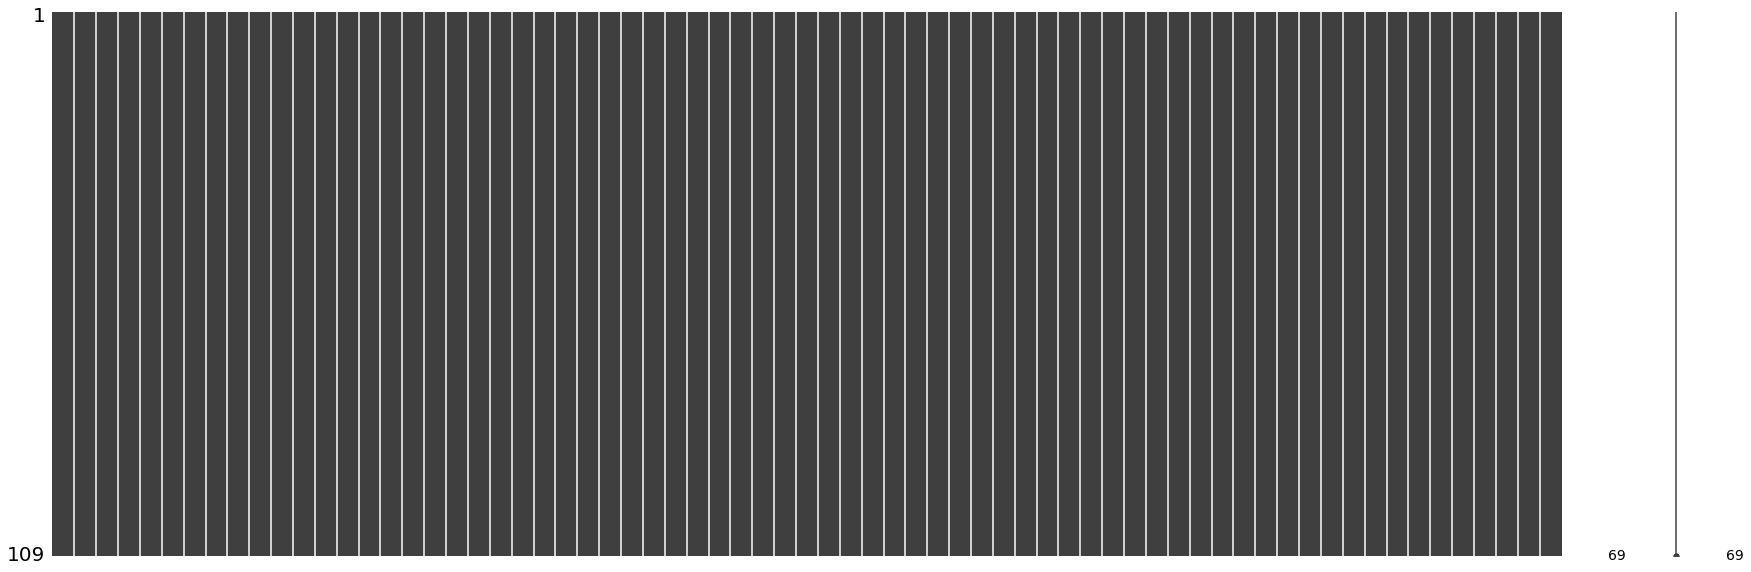

In [26]:
missingno.matrix(df, figsize=(30,10))

*transformando strings em númericos*

In [27]:
for i in df.columns[1:]:
    df[i]=df[i].astype(int)

In [28]:
type(df["color"][0])

numpy.int32

*com essa imagem, concluimos que não existe dados faltantes*

*Agora estamos prontos pra usar nosso modelo de similaridade*

## **Similaridade**

### Similaridade usando o cosine_similarity

A similaridade do cosseno é uma medida de similaridade entre dois vetores diferentes de zero. É calculado como o ângulo entre esses vetores (que também é o mesmo que seu produto interno).

Seu valor vai de 0 a 1. Se for 0, ambos os vetores são completamente opostos, se for 1, será completamente semelhante.

In [29]:
#Metricas
from sklearn.metrics.pairwise import cosine_similarity

In [104]:
caract = df.drop(columns=["uisque_name"])
uisque = df["uisque_name"]

In [105]:
X = caract.values
similarity = cosine_similarity(X)

In [139]:
def ranking_similaridade(nome):
  index = df[df["uisque_name"] == nome].index[0]
  distance = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x:x[1])
  print("#### Ranking de similaridade #### \n")
  for i in distance[1:10]:
    print(df.iloc[i[0]]["uisque_name"], "-", round(i[1]*100, 2), "%")

In [140]:
ranking_similaridade("Bunnahabhain")

#### Ranking de similaridade #### 

Glenglassaugh - 52.7 %
Tullibardine - 52.62 %
Glenmorangie - 50.71 %
Ardberg - 50.0 %
Bruichladdich - 50.0 %
Glen Deveron - 48.99 %
Glenlossie - 46.02 %
Oban - 46.02 %
Springbank - 46.02 %


### Similaridade usando o pdist

*calculando distâncias euclidianas entre as linhas*

In [34]:
from scipy.spatial.distance import pdist, squareform

In [35]:
distancias = pdist(caract.values, 
                    metric='euclidean')

distancias = squareform(distancias)
distancias.shape

(109, 109)

*Ranking de distância euclidiana normalizada entre os vetores*

In [137]:
def ranking_distancia(nome):
  index = df[df["uisque_name"] == nome].index[0]
  distance = sorted(list(enumerate(1-distancias[index]/10)), reverse=True, key = lambda x:x[1])
  print("#### Ranking de similaridade #### \n")
  for i in distance[1:10]:
    print(df.iloc[i[0]]["uisque_name"], "-", round(i[1]*100, 2), "%")

In [138]:
ranking_distancia("Bunnahabhain")

#### Ranking de similaridade #### 

Glenglassaugh - 70.0 %
Ardberg - 68.38 %
Bruichladdich - 68.38 %
Tullibardine - 66.83 %
Aultmore - 65.36 %
Balblair - 65.36 %
Ben Nevis - 65.36 %
Benriach - 65.36 %
Bowmore - 65.36 %


### *KNN - Unsupervised Nearest Neighbors*

In [40]:
from sklearn.neighbors import NearestNeighbors

In [106]:
knn = NearestNeighbors()
knn.fit(X)

NearestNeighbors()

In [107]:
distancia, indices = knn.kneighbors(X, n_neighbors = 10)

In [111]:
distancia[10]

array([0.        , 3.16227766, 3.16227766, 3.31662479, 3.31662479,
       3.31662479, 3.31662479, 3.31662479, 3.46410162, 3.46410162])

In [79]:
indices[0]

array([18, 19, 46, 48, 32, 67, 83, 88, 56,  9], dtype=int64)

In [95]:
# #Criando função de similaridade
# def knn_distancia(nome):
#   X = df[df["uisque_name"] == nome].drop(columns=["uisque_name"]).values
#   distancia, indices = knn.kneighbors(X, n_neighbors = 11)
#   for i in range(len(distancia[0])-1):
#     print(df.iloc[indices[0][i+1]]["uisque_name"], "-", "score", round((10 - distancia[0][i+1]), 2), "%")

In [135]:
#Criando função de similaridade
def knn_distancia(nome):
  index = df[df["uisque_name"] == nome].index[0]
  print("#### Ranking de similaridade #### \n")
  for i in range(len(distancia[index])-1):
    # print(indices[index][i])
    # print(distancia[index][i])   
    print(df.iloc[indices[index][i+1]]["uisque_name"], "-", "score", round((1 - (distancia[index][i+1]/10))*100, 2))    

In [136]:
knn_distancia("Bunnahabhain")

#### Ranking de similaridade #### 

Glenglassaugh - score 70.0
Bruichladdich - score 68.38
Ardberg - score 68.38
Tullibardine - score 66.83
Glenmorangie - score 65.36
Bowmore - score 65.36
Cragganmore - score 65.36
Ben Nevis - score 65.36
Deanston - score 65.36


## Comparando as três formas de calcular a distância

In [141]:
ranking_distancia("Bunnahabhain")

#### Ranking de similaridade #### 

Glenglassaugh - 70.0 %
Ardberg - 68.38 %
Bruichladdich - 68.38 %
Tullibardine - 66.83 %
Aultmore - 65.36 %
Balblair - 65.36 %
Ben Nevis - 65.36 %
Benriach - 65.36 %
Bowmore - 65.36 %


In [38]:
ranking_similaridade("Bunnahabhain")

Glenfiddich - 57.15 %
Bunnahabhain - 50.0 %
Cardhu - 43.85 %
Fettercairn - 43.85 %
Glenlivet - 42.26 %
Glenury Royal - 42.26 %
Glenglassaugh - 42.16 %
Glenlochy - 40.82 %
Deanston - 40.0 %


In [97]:
knn_distancia("Bunnahabhain")

Glenglassaugh - score 7.0 %
Ardberg - score 6.84 %
Bruichladdich - score 6.84 %
Tullibardine - score 6.68 %
Ben Nevis - score 6.54 %
Cragganmore - score 6.54 %
Bowmore - score 6.54 %
Glenmorangie - score 6.54 %
Deanston - score 6.54 %
Caperdonich - score 6.54 %


ranking_distancia("Bruichladdich")

In [39]:
df.head(25)

,uisque_name,color,color.1,color.2,color.3,color.4,color.5,color.6,color.7,color.8,...,FIN.9,FIN.10,FIN.11,FIN.12,FIN.13,FIN.14,FIN.15,FIN.16,FIN.17,FIN.18
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Aberlour,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Ardberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Ardmore,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Auchentoshan,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,Aultmore,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Balblair,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,Balmenach,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,Balvenie,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9,Banff,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
